In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import colors
import threading, queue
import scipy.io


from Tree import Node


In [29]:
#split s means we check all y-values to see if they're above or below the line
# %%
#split s means we check all y-values to see if they're above or below the line
'''
split cost functions
Desc: finds cost of a split
parameters: 
s: split value
c1: mean color left/below split [r,g,b]
c2: mean color right/above split [r,g,b]
'''
def hor_split_cost(s, y_values, vals):
    #get values left
    #print(vals)
    left_values = vals[np.where(y_values <= s)]
    right_values = vals[np.where(y_values > s)]
    #print(np.shape(left_values))
    c1 = np.mean(left_values, axis = 0)
    c2 = np.mean(right_values, axis = 0)
    #print(len(left_values), len(right_values))
    #print(np.shape(np.tile(c1, (np.size(left_values), 1))))
    #print(left_values, np.tile(c1, (np.size(left_values), 1)))
    #print(np.shape(left_values), "vs", np.shape(np.tile(c1, (np.shape(left_values)[0], 1))))
    left_values -= np.tile(c1, (np.shape(left_values)[0], 1))
    left_cost = np.sum(np.square(np.linalg.norm(left_values, axis=1)))
        
    right_values -= np.tile(c2, (np.shape(right_values)[0], 1))
    right_cost = np.sum(np.square(np.linalg.norm(right_values, axis=1)))
    cost = right_cost + left_cost
    return cost, c1, c2

def vert_split_cost(s, x_values, vals):
    #get values left 
    left_values = vals[np.where(x_values <= s)]
    right_values = vals[np.where(x_values > s)]
    c1 = np.mean(left_values, axis = 0)
    c2 = np.mean(right_values, axis = 0)
    #print(len(left_values))
    #print(c1)
    left_values -= np.tile(c1, (np.shape(left_values)[0], 1))
    left_cost = np.sum(np.square(np.linalg.norm(left_values, axis=1)))
        
    right_values -= np.tile(c2, (np.shape(right_values)[0], 1))
    right_cost = np.sum(np.square(np.linalg.norm(right_values, axis=1)))

    #print(left_values)
    cost = left_cost + right_cost
    return cost, c1, c2

In [30]:
'''
Returns direction & optimal split value
'''
def OptimalSplitRegression(x_data,y_data,vals):
    #print(x_data,y_data,vals)
    #pre-sort X & Y values:
    x_sorted = np.sort(x_data)
    y_sorted = np.sort(y_data)
    #print("xsorted", y_sorted, y_data)
    if(len(x_sorted) == 0 and len(y_sorted) == 0):
        print("MAJOR ISSUE: No Values")
    #print(x_sorted)

    #get split values by summing array with shifted array by 1 to right and taking mean of every entry
    x_splits = 0.5 * (x_sorted[:-1]+np.roll(x_sorted,-1)[:-1])
    y_splits = 0.5 * (y_sorted[:-1]+np.roll(y_sorted,-1)[:-1])
    #print(x_splits, y_splits)
     
    min_cost = float('inf')
    min_c1: np.array
    min_c2: np.array
    min_direction = False
    min_s = 0
    #print("starting splits")
    #find min cost split among both x and y splits
    for x_split in x_splits:
        cost, c1, c2 = vert_split_cost(x_split, x_data, vals)
        #print(f'x_split: {x_split}; cost: {cost}')
        if(cost < min_cost):
            min_s = x_split
            min_cost = cost
            min_c1 = c1
            min_c2 = c2
            min_direction = True
    
    #print("Done with X splits")
    for y_split in y_splits:
        cost, c1, c2 = hor_split_cost(y_split, y_data, vals)
        #print(f'y_split: {y_split}; cost: {cost}')
        if(cost < min_cost):
            min_s = y_split
            min_cost = cost
            min_c1 = c1
            min_c2 = c2
            min_direction = False
    return min_s, min_cost, min_c1, min_c2, min_direction

In [31]:
#    write_to_image(img, node.x_min, node.x_max, node.y_min, node.y_max, np.mean(node.values, axis = 1))

def write_to_image(img, x_min, x_max, y_min, y_max, c):
    #print(dir, x_min, x_max, y_min, y_max, s, c1, c2, x_dim, y_dim)
    img[x_min:x_max, y_min:y_max] = c
    return img

In [32]:
'''
#Code for Regression Tree:
MAX_ITTER = 2
x_dim = 100
y_dim = 100

Y = np.array([0.25, 0.1, 0.8])
X = np.array([0.25,0.8,0.6])
V = np.array([[0.1,0.5,0.2],[0.4,0.1,0.3],[0.9,0.2,0.0]])
n = 3

vals = V
y_values = Y
s = 0.5
left_values = vals[np.nonzero(y_values <= s)]
right_values = vals[np.nonzero(y_values > s)]

print(np.nonzero(y_values > s))
'''

'\n#Code for Regression Tree:\nMAX_ITTER = 2\nx_dim = 100\ny_dim = 100\n\nY = np.array([0.25, 0.1, 0.8])\nX = np.array([0.25,0.8,0.6])\nV = np.array([[0.1,0.5,0.2],[0.4,0.1,0.3],[0.9,0.2,0.0]])\nn = 3\n\nvals = V\ny_values = Y\ns = 0.5\nleft_values = vals[np.nonzero(y_values <= s)]\nright_values = vals[np.nonzero(y_values > s)]\n\nprint(np.nonzero(y_values > s))\n'

s: 0.525, c1: [0.25 0.3  0.25], c2: [0.9 0.2 0. ]
len lengths:  (array([0, 1], dtype=int64),) (array([2], dtype=int64),) 2
s: 0.525, c1: [0.1 0.5 0.2], c2: [0.4 0.1 0.3]
len lengths:  (array([0], dtype=int64),) (array([1], dtype=int64),) 1
Done splitting!


'\nwe need top get the indices of the values and then \n'

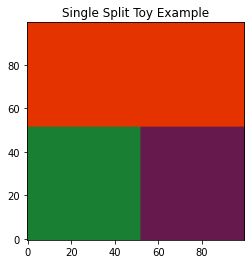

In [39]:
#Code for Regression Tree:
MAX_ITTER = 2
x_dim = 100
y_dim = 100

Y = np.array([0.25, 0.1, 0.8])
X = np.array([0.25,0.8,0.6])
V = np.array([[0.1,0.5,0.2],[0.4,0.1,0.3],[0.9,0.2,0.0]])
n = 1

#stores leaves to consider
q = queue.Queue()
# X_points, Y_points, x_min, x_max, y_min, y_max, color
init_node = Node(X, Y, V, 0, x_dim, 0, y_dim)

q.put(init_node)
itter = 0
img = np.zeros((x_dim, y_dim, 3))

#q.qsize() function is inaccurate, so we use our own count
queue_count = 2
leaf_list = []
while itter < MAX_ITTER and queue_count > 0:
    itter += 1
    curr_node = q.get()
    queue_count -= 1
    s, cost, c1, c2, direction = OptimalSplitRegression(curr_node.x_elements,curr_node.y_elements,curr_node.vals)
    #print(curr_node.x_elements, curr_node.y_elements)
    #write to our image with the current split
    print(f"s: {s}, c1: {c1}, c2: {c2}")
    if(not direction):
        #horizontal cut:
        y_left = curr_node.y_elements[curr_node.y_elements <= s]
        y_right = curr_node.y_elements[curr_node.y_elements > s]

        lefts = np.where(curr_node.y_elements <= s)
        rights = np.where(curr_node.y_elements > s)

        left_values = curr_node.vals[lefts]
        right_values = curr_node.vals[rights]

        #create children node we push to the queue: 
        left_node = Node(curr_node.x_elements[lefts], y_left, left_values, curr_node.x_min, curr_node.x_max, curr_node.y_min, int(s*y_dim))
        right_node = Node(curr_node.x_elements[rights], y_right, right_values, curr_node.x_min, curr_node.x_max, int(s*y_dim), curr_node.y_max)
        print("len lengths: ", lefts, rights, np.size(lefts))

        #enqueue mixed leaves:
        if(np.size(lefts) > 1 and cost > 0):
            q.put(left_node)
            queue_count += 1
        else:
            leaf_list.append(left_node)
        if(np.size(rights) > 1 and cost > 0):
            q.put(right_node)
            queue_count +=1
        else:
            leaf_list.append(right_node)
    else:
        #vertical cut:
        x_left = curr_node.x_elements[curr_node.x_elements <= s]
        x_right = curr_node.x_elements[curr_node.x_elements > s]
        lefts = np.where(curr_node.x_elements <= s)
        rights = np.where(curr_node.x_elements > s)
        left_values = curr_node.vals[lefts]
        right_values = curr_node.vals[rights]
        
        #create children node we push to the queue:
        left_node = Node(x_left, curr_node.y_elements[lefts], left_values, curr_node.x_min, int(s*x_dim), curr_node.y_min, curr_node.y_max)
        right_node = Node(x_right, curr_node.y_elements[rights], right_values, int(s*x_dim), curr_node.x_max, curr_node.y_min, curr_node.y_max)
        print("len lengths: ", lefts, rights, np.size(lefts))

        if(np.size(lefts) > 1 and cost > 0):
            q.put(left_node)
            queue_count += 1
        else:
            leaf_list.append(left_node)
        if(np.size(rights) > 1 and cost > 0):
            q.put(right_node)
            queue_count +=1
        else:
            leaf_list.append(right_node)
#print(itter, queue_count)
print("Done splitting!")
#draw on image with leaf nodes:
for node in leaf_list:
    img[node.x_min: node.x_max,  node.y_min:node.y_max] = np.mean(node.vals, axis = 0)
while q.qsize() >0:
    print(q.qsize())
    node = q.get()
    print(node.x_min, node.x_max,  node.y_min,node.y_max, node.vals)
    img[node.x_min: node.x_max,  node.y_min:node.y_max] = np.mean(node.vals, axis = 0)

plt.title("Single Split Toy Example")
plt.imshow(img.transpose(1,0,2), origin = "lower")

plt.savefig("regression_tree2-1.png")
'''
we need top get the indices of the values and then 
'''

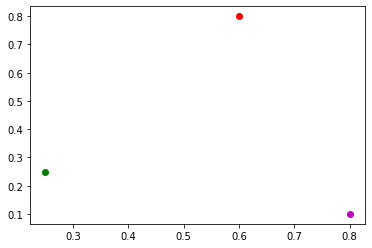

In [61]:
colors = ['g', 'm', 'r']
for i in range(0,3):
    plt.scatter(X[i],Y[i], c = colors[i])
plt.savefig("toy_example.png")
plt.show()
